<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1arSsASxRFN6WrVQstBehnthjkPv-a83h?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [2]:
# Import Packages
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import matplotlib.pyplot as plt

In [3]:
import sys

assert sys.version_info >= (3, 7)

In [4]:


def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    
    data_path = Path("datasets/housing/housing.csv")
    return pd.read_csv(data_path), data_path.parent.resolve()

housing, data_directory = load_housing_data()

print(f"Data is saved in: {data_directory}")


housing , _ = load_housing_data()

Data is saved in: /Users/javi/gDrive/Strathmore/AML-SU/AML_notebooks/datasets/housing


In [5]:
#Eye Balling the data

# Shape of the data
print(housing.shape)

# Display the first 5 rows
housing.head(5)


(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Check data Types

housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Summary Statistics

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Insights**

Housing Age - The median age of houses is 29 years, indicating a mix of relatively old and new homes. The wide range (from 1 to 52 years) shows diversity in housing stock, with some very new constructions and some older properties.

Room and Bedroom - There is significant variability in the number of total rooms and bedrooms, suggesting a diverse range of property sizes. The large standard deviations relative to the means indicate that while most houses have a moderate number of rooms and bedrooms, there are also some extremely large properties.

Housing  Value - The median house value shows substantial variability with a wide range from  14,999 to  500,001. The high mean and standard deviation indicate a large disparity in housing 


So what next??? Further investigation

Potential Areas for Further Analysis:

- Investigate the relationship between median income and median house value to understand affordability.
- Analyze the impact of housing age on house value.
- Examine the correlation between the number of rooms and house value to see if larger homes command higher prices.
- Look into the distribution of population and households to identify trend.

----
----

#### Exploratory Analysis 

- Is an approach to analyzing data set to summarize their main characterists , often using visual methods

EDA Involves

1. Understanding Data Structure
2. Descriptive Statistics
3. Data Visualization
4. Identifying Patterns and Relationships

#### Approches of EDA

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

##### Univariate Analysis

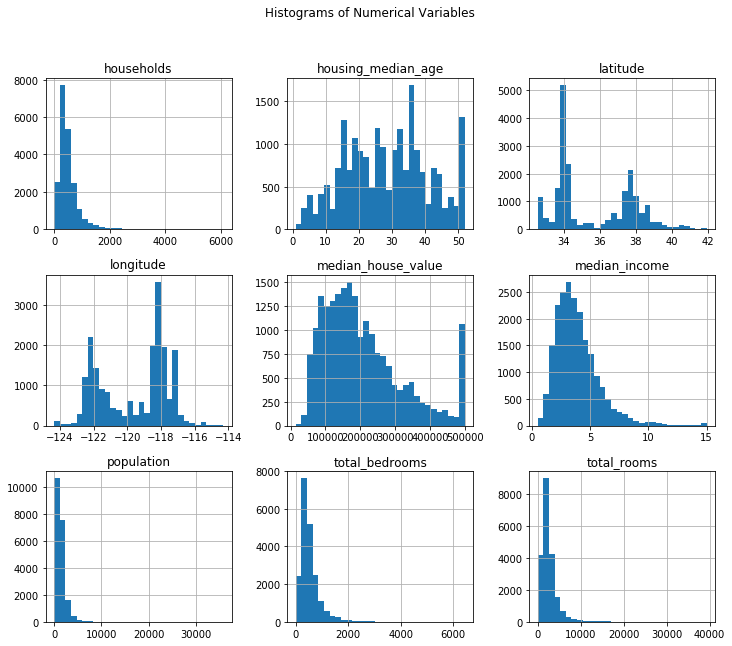

In [8]:
# Distribution plots

# Histograms for numerical variables

housing.select_dtypes(include='float64').hist(bins=30, figsize=(12, 10))

plt.suptitle('Histograms of Numerical Variables')
plt.show()

**Insights**

1. This histogram shows the distribution of **median incomes** across a dataset. It appears to be right-skewed, meaning there are more instances of lower median incomes with a tail extending towards higher incomes.

2. The distribution of **median house** values is also right-skewed, indicating more houses with lower values and a smaller number of very expensive houses.

3. The histogram is also right-skewed suggesting a larger number of houses with fewer rooms and a decreasing number of houses with more rooms.
Total Bedrooms: Like the other histograms, the distribution of total bedrooms is right-skewed, with more houses having a lower number of bedrooms.

All four histograms exhibit right-skewed distributions, indicating that the data for each attribute tends to cluster towards lower values with fewer instances of higher values.

The shapes of the histograms suggest potential outliers or extreme values in the datasets, especially for median house value and total rooms.
The histograms provide a visual summary of the central tendency and dispersion of each attribute.


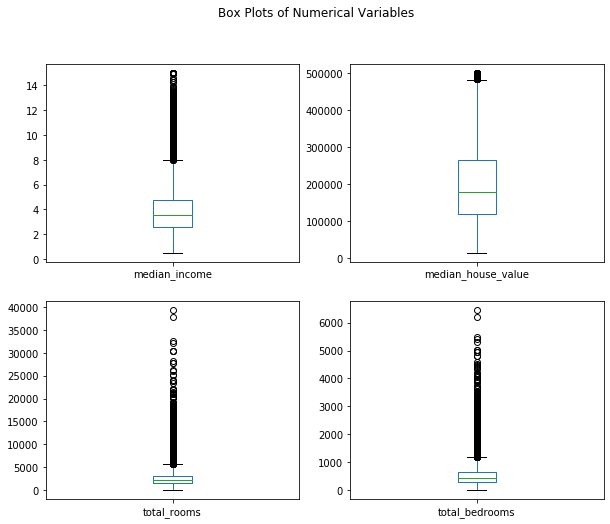

In [9]:
# Box plots

housing[['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']].plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 8), title='Box Plots of Numerical Variables')
plt.show()

**Insights**

1. Distributions are heavily right-skewed, indicated by the long whiskers and outliers towards the higher values.


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


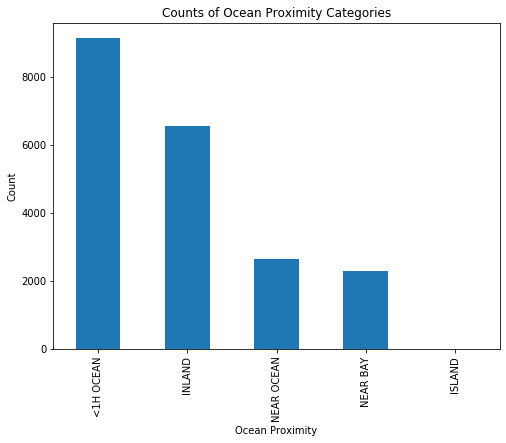

In [10]:
# Categorical Variable Distribution:
print(housing['ocean_proximity'].value_counts())

# Bar plot for categorical variable
housing['ocean_proximity'].value_counts().plot(kind='bar', figsize=(8, 6), title='Counts of Ocean Proximity Categories')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

##### Bivariate Analysis

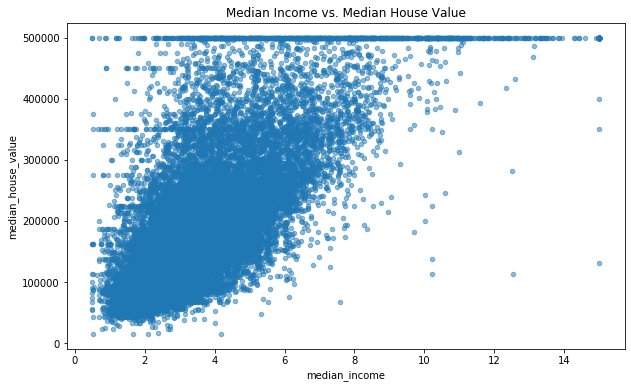

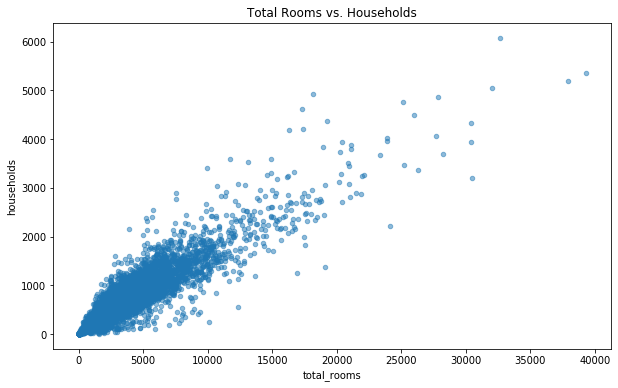

In [11]:
# Scatter plots for numerical vs. numerical relationships
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, figsize=(10, 6), title='Median Income vs. Median House Value')
plt.show()

housing.plot(kind='scatter', x='total_rooms', y='households', alpha=0.5, figsize=(10, 6), title='Total Rooms vs. Households')
plt.show()


**Insights**

- The  first plot shows a clear upward trend, indicating a positive correlation between median income and median house value , means that as median income increases, median house values tend to increase as well.

- The spread of the data points increases as median income rises. This suggests that higher-income areas have a wider range of house values.

- The second plot suggests that there's a strong association between the number of rooms in an area and the number of households residing there

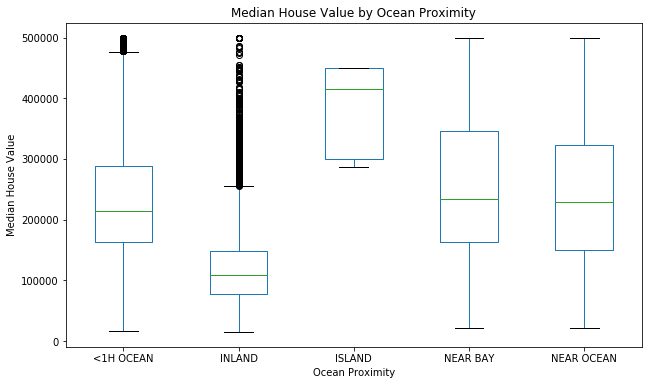

In [12]:
# Box plot Median house Value vS OCean Promixity

housing[['ocean_proximity', 'median_house_value']].boxplot(by='ocean_proximity', figsize=(10, 6), grid=False)
plt.title('Median House Value by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


**Insights**

- Houses located near the ocean (NEAR OCEAN and NEAR BAY) generally have higher median house values compared to those inland or farther from the ocean (<1H OCEAN and INLAND).
- House located in ISLAND has the highest value.

Concluding  ocean proximity and ISLAND is a strong factor influencing median house values.

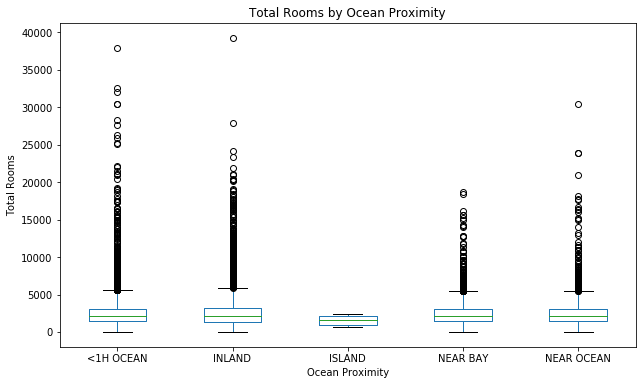

In [13]:
# Box plot Total Rooms vS OCean Promixity

housing[['ocean_proximity', 'total_rooms']].boxplot(by='ocean_proximity', figsize=(10, 6), grid=False)
plt.title('Total Rooms by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Total Rooms')
plt.show()

**Insights**

- There are numerous outliers especially in the categories of  OCEAN ,INLAND, NEAR BAY and NEAR OCEAN, suggesting some properties with exceptionally high numbers of rooms.

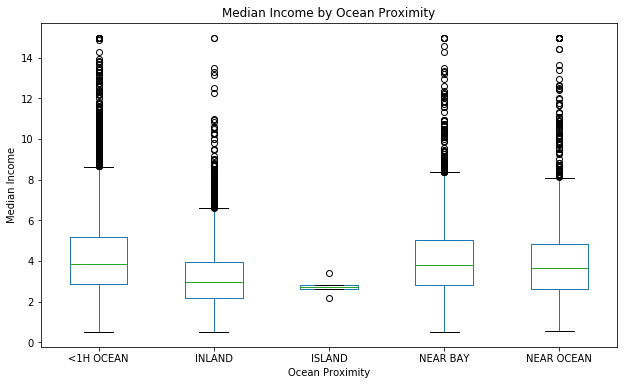

In [14]:
# Box plot Median Income vS OCean Promixity

housing[['ocean_proximity', 'median_income']].boxplot(by='ocean_proximity', figsize=(10, 6), grid=False)
plt.title('Median Income by Ocean Proximity')
plt.suptitle('')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.show()

##### Multivariate Analysis

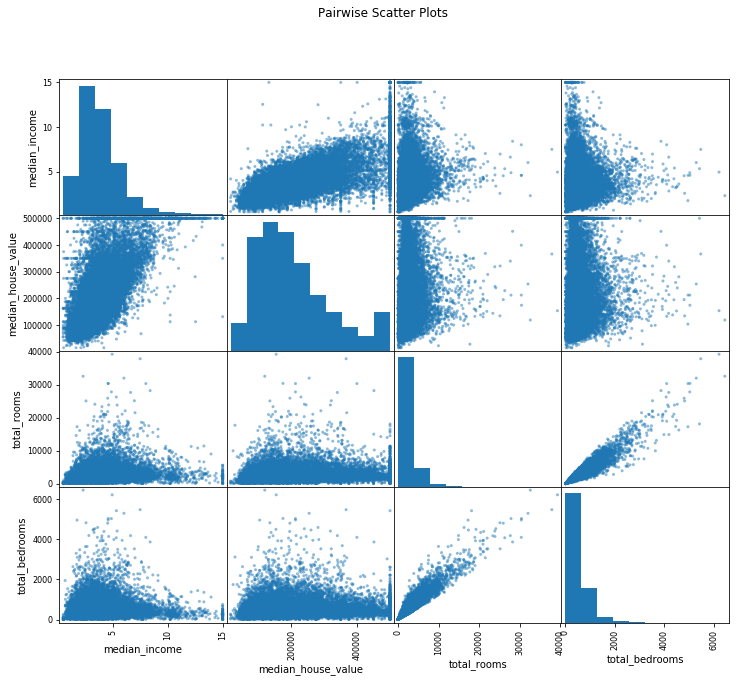

In [15]:
# Pairwise scatter plots
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']], figsize=(12, 10), alpha=0.5)
plt.suptitle('Pairwise Scatter Plots')
plt.show()


### Looking for correlations

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

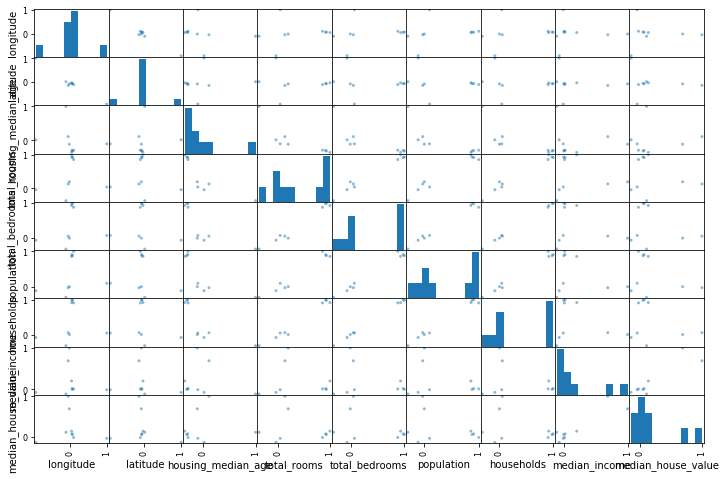

In [23]:
scatter_matrix(corr_matrix , figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()